# Demand Prediction for Bike Sharing

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
#Beginning EDA
bike = pd.read_csv("hour.csv")


bike.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [3]:
bike.shape

(17379, 17)

In [4]:
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [5]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
#Investigate if there are any duplicates
duplicate_rows_bike = bike[bike.duplicated()]
print('number of duplicate rows: ', duplicate_rows_bike.shape)

number of duplicate rows:  (0, 17)


<Axes: >

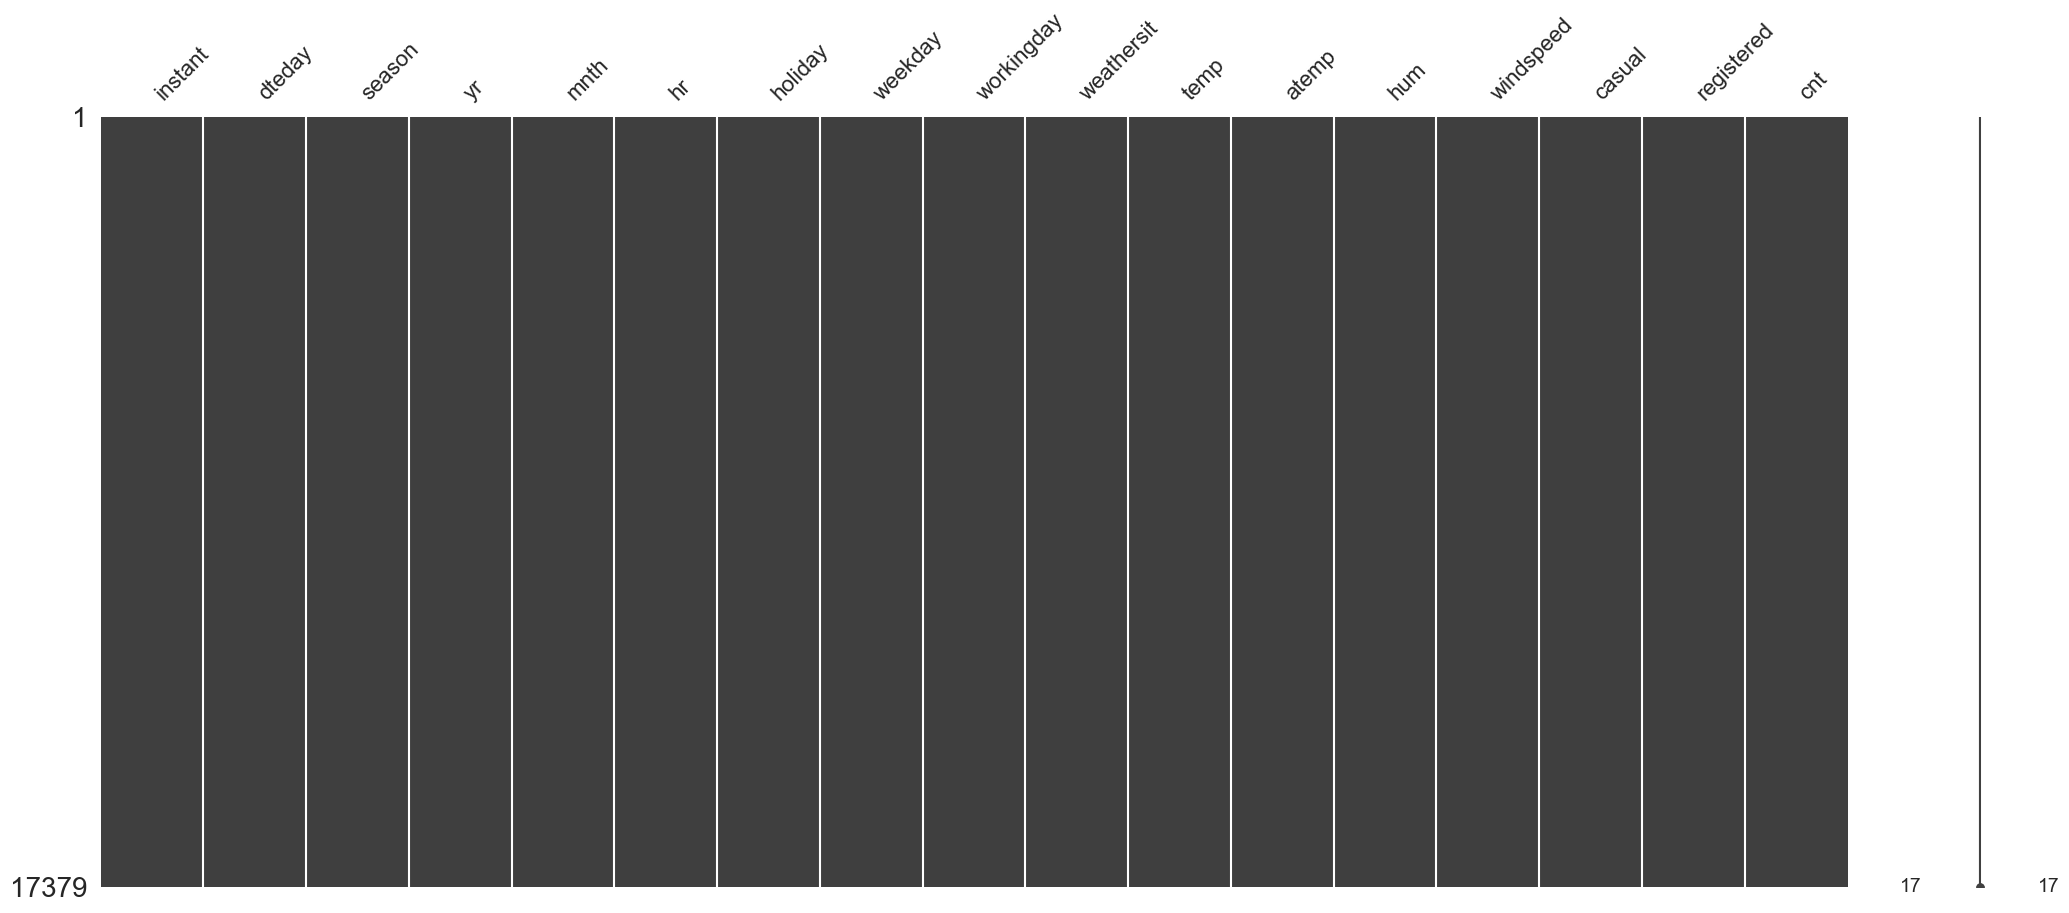

In [7]:
#Investigate if there are any missing values
import missingno as mn
mn.matrix(bike)

In [8]:
#Rename the columns
bike.rename(columns={'yr':'year','mnth':'month','weathersit':'weather_situation',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [9]:
#drop columns we don't need
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.head()

,season,year,month,hr,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [10]:
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weather_situation,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


In [11]:
print(bike.dtypes)

season                 int64
year                   int64
month                  int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weather_situation      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
total_count            int64
dtype: object


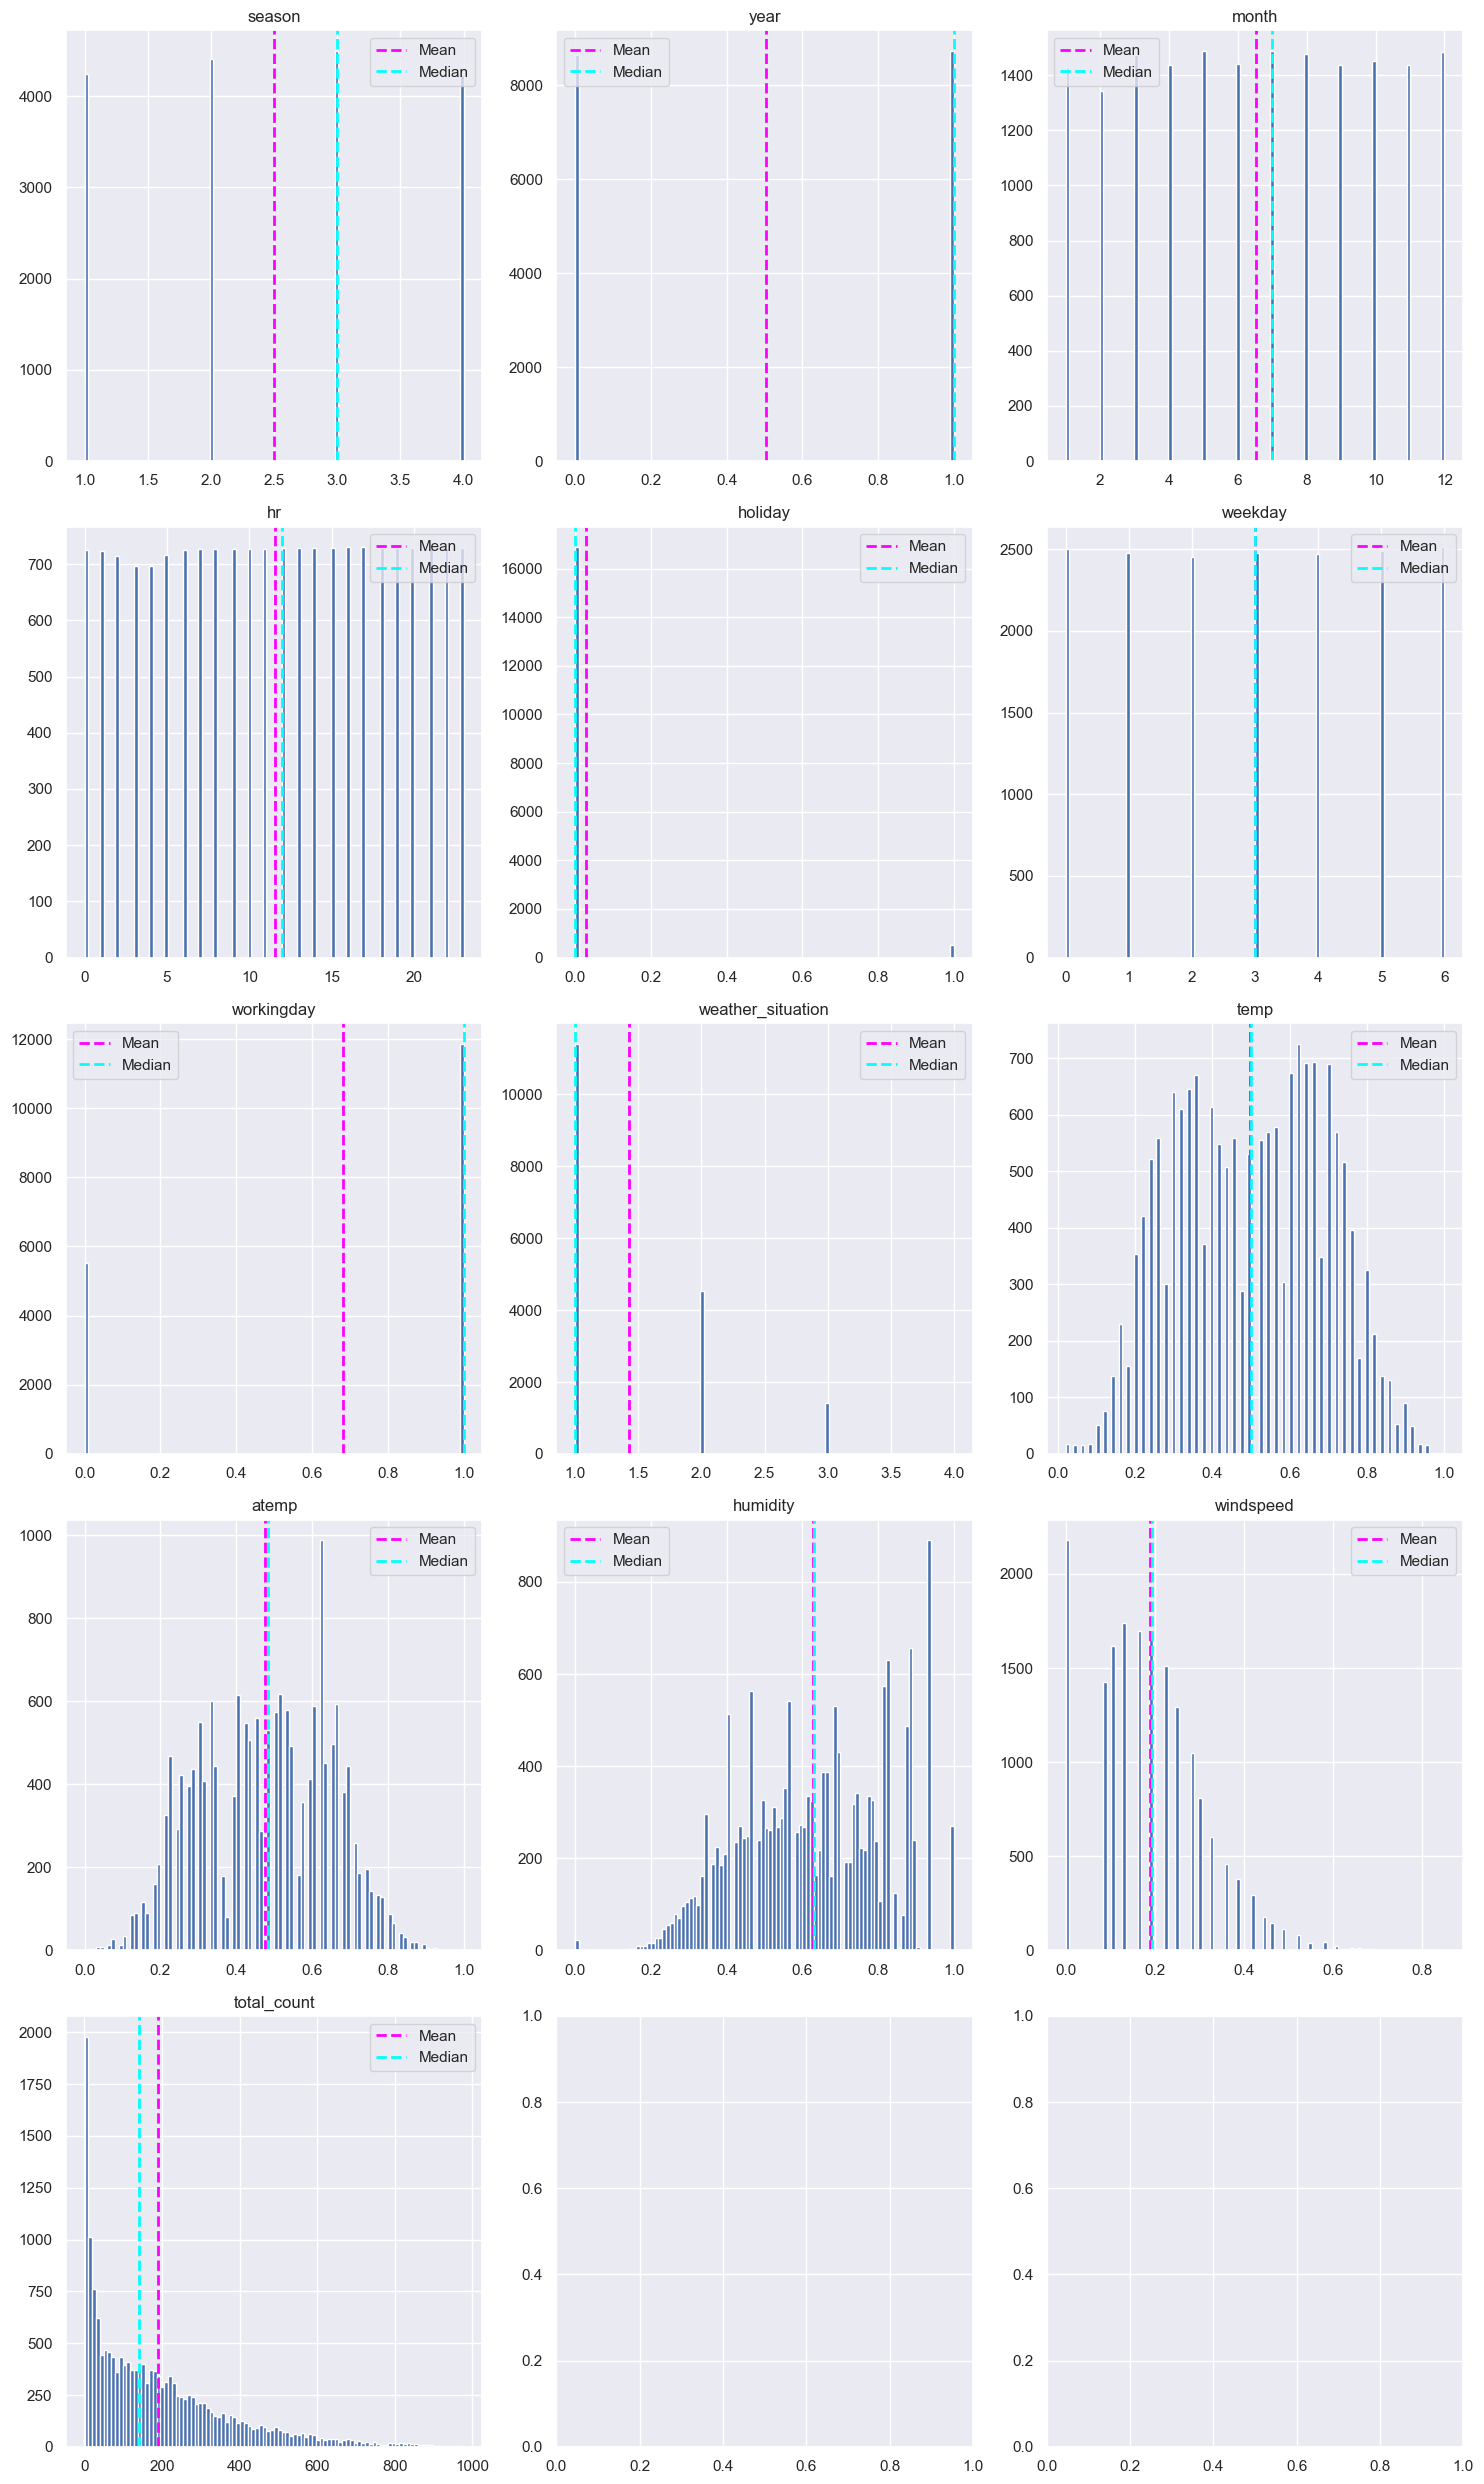

In [12]:
#Creating histograms to visualise normality/skewedness of data 

# Get all numeric features
numeric_features = bike.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots, the goal here is to visually arrange the subplots nicely.
num_rows = (len(numeric_features) + 2) // 3
num_cols = min(len(numeric_features), 3)


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for each numeric feature
for i, col in enumerate(numeric_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    feature = bike[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

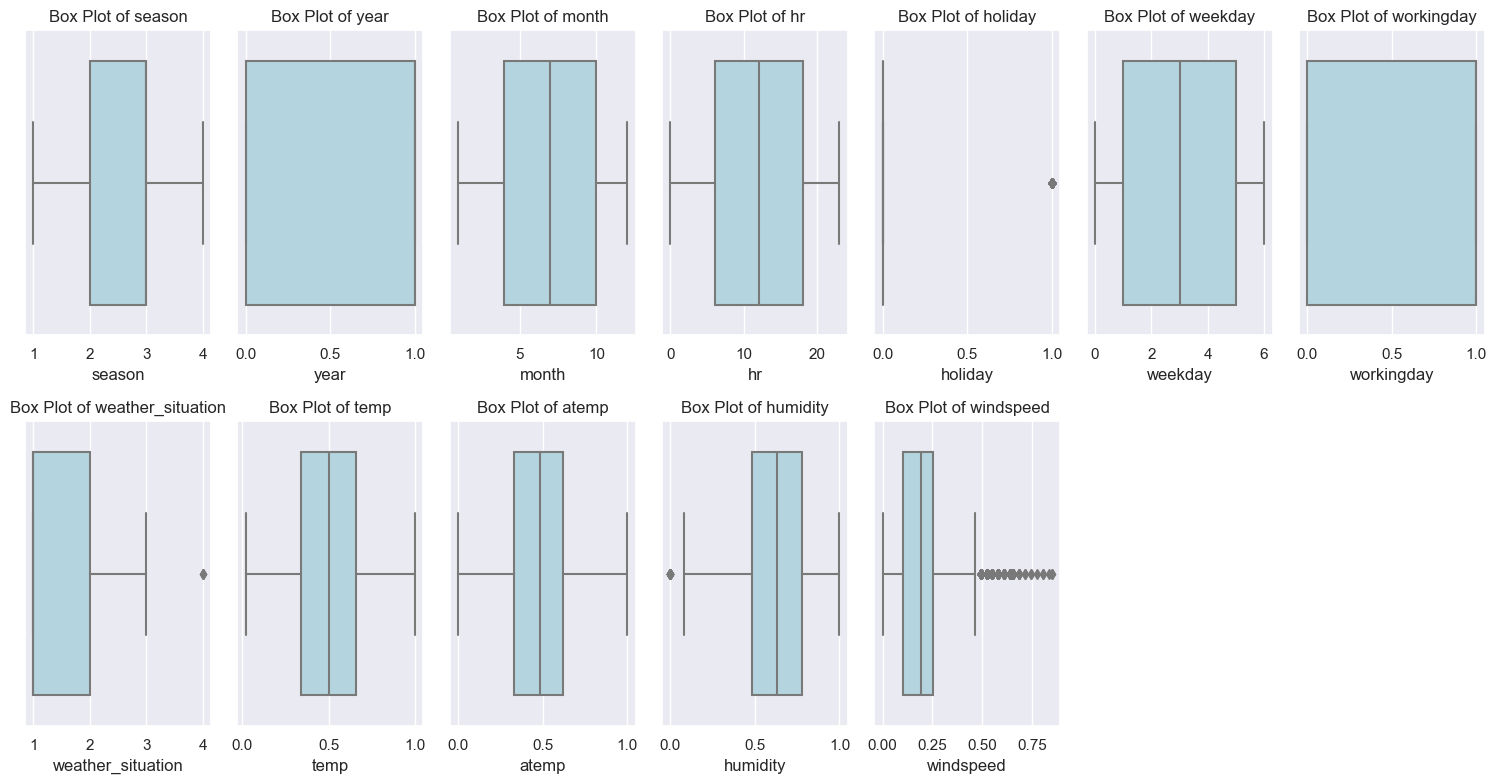

In [13]:
#Creating boxplots to visualise outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numerical columns except 'count')
numerical_columns = bike.drop(['total_count'], axis=1)

# Create subplots for numerical features
num_rows = 2
num_cols = len(numerical_columns.columns) // num_rows + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=col, data=bike, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(num_cols * num_rows):
    if j >= len(numerical_columns.columns):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

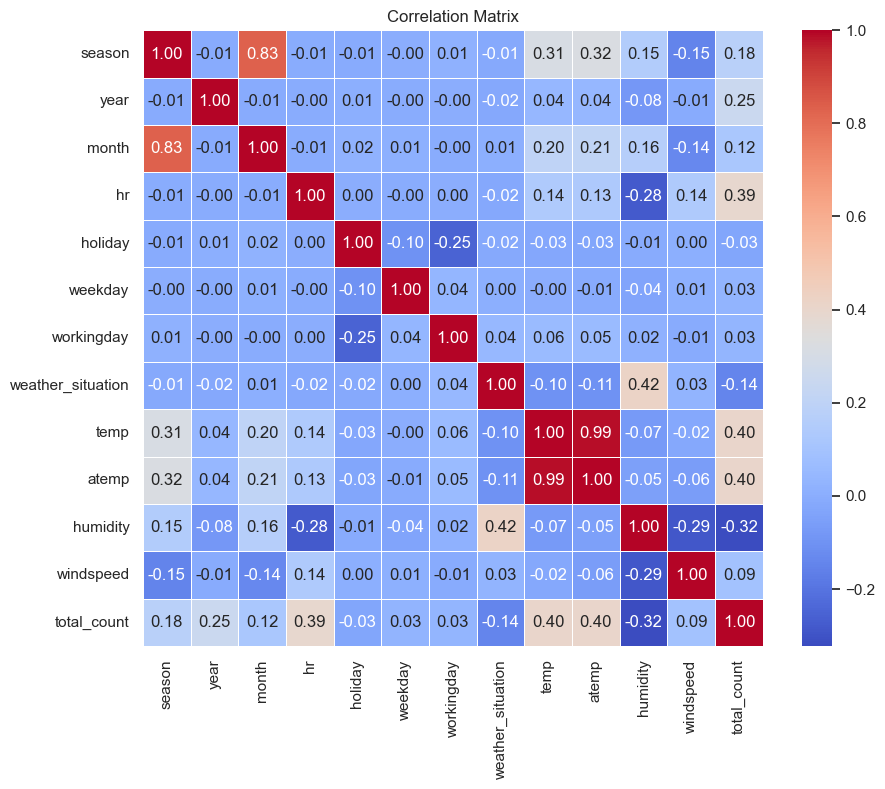

In [14]:
#EDA Multivariate Analysis
#creating a correlation matrix to visualise the connection between features
correlation_matrix = bike.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
#Temp and atemp are highly correlated: 0.99 I will drop one

bike.drop(['temp'], axis = 1, inplace = True)

bike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.0,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.0,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.0,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.0,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.0,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.0,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.0,0.0000,1.0000,1.0000,1.0000
weather_situation,17379.0,1.425283,0.639357,1.0,1.0000,1.0000,2.0000,4.0000
atemp,17379.0,0.475775,0.171850,0.0,0.3333,0.4848,0.6212,1.0000
humidity,17379.0,0.627229,0.192930,0.0,0.4800,0.6300,0.7800,1.0000


In [16]:
#Scaling the data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming X contains the features and y is the target variable
X = bike.drop('total_count', axis=1)
y = bike['total_count']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape



((17379, 11), (17379,), (13903, 11), (3476, 11), (13903,), (3476,))

In [17]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [18]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.3872786809112516
STD:  0.019524497165145087




In [19]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-9.116767444738883
[  61.80795169   82.93852617    1.23204404  176.07431337  -23.64713529
   11.02599776    4.02479926   -9.76120652  314.68416602 -200.58279206
   34.07797717]


In [20]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
y_pred

array([445.0146783 , 203.37830824,  56.54848141, ...,  43.73513166,
       191.4303801 , 215.50063376])

In [21]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
12830,425,445.014678
8688,88,203.378308
7091,4,56.548481
12230,526,382.157837
431,13,-22.993155


In [22]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 104.7837234991706
Mean Squared Error: 19369.800773875897
Root Mean Squared Error: 139.17543164609154


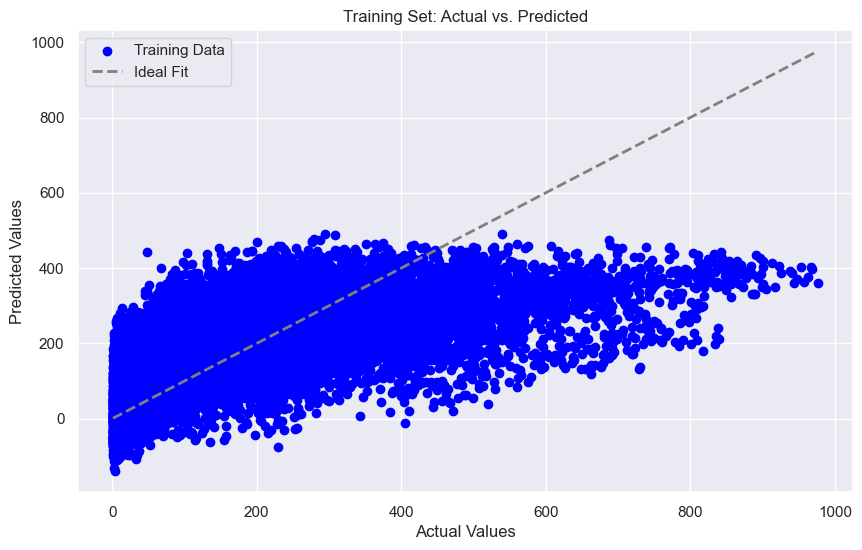

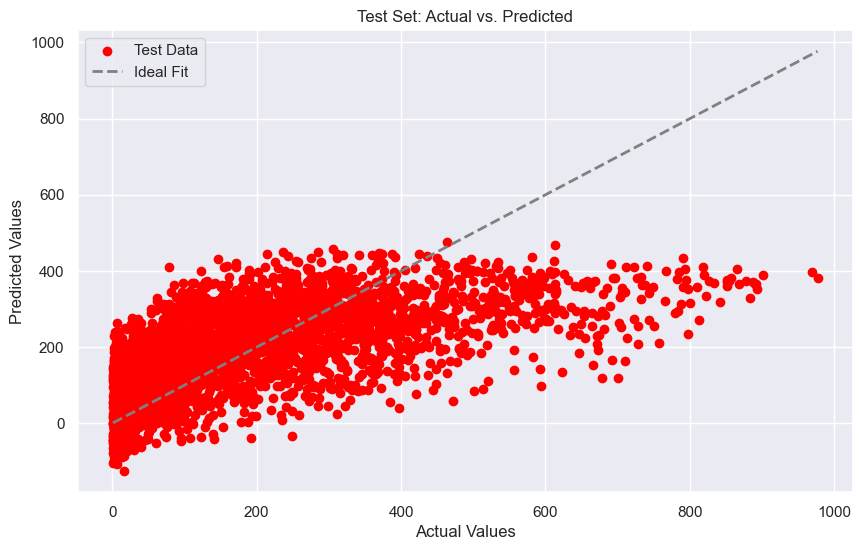

In [23]:
import matplotlib.pyplot as plt

# Predictions on the training set
y_train_pred = lr.predict(X_train)

# Predictions on the test set
y_test_pred = lr.predict(X_test)

# Scatter plot for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', linewidth=2, label='Ideal Fit')
plt.title('Training Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Scatter plot for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='red', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Ideal Fit')
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()